In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [ ]:
df=pd.read_excel('cluster analysis.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52245 entries, 0 to 52244
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Individual LookupID                        52245 non-null  int64  
 1   Age                                        52245 non-null  int64  
 2   Birth Date                                 52245 non-null  int64  
 3   Age Range Category                         52245 non-null  int64  
 4   Age Range                                  52245 non-null  object 
 5   Regional Category Codes                    52245 non-null  int64  
 6   BUSN Volunteer (either type) (Y/N)         52245 non-null  int64  
 7   HH Affinity Total (parent, child, spouse)  52245 non-null  int64  
 8   fy23 Engagement excl $$                    52245 non-null  int64  
 9   fy24 Engagement excl $$                    52245 non-null  int64  
 10  BUSN Affiliation-Emplo

**K-Means Method**

In [ ]:
# Select relevant features for clustering
features = [
    "Age Range Category", "Regional Category Codes", "BUSN Volunteer (either type) (Y/N)",
    "HH Affinity Total (parent, child, spouse)", "fy23 Engagement excl $$", "fy24 Engagement excl $$",
    "BUSN Affiliation-Employment", "BUSN Affiliation-Student Involvement",
    "Affiliation- BUSN score minus giving", "UIUC Affiliation minus giving",
    "UIUC Affiliation Employment", "UIUC Affiliation-Student Involvement"
]


In [ ]:
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:

# Determine the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []
k_range = range(2, 11)  # Test k from 2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)  # Sum of squared distances
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.show()

In [ ]:

# Choose an optimal k (based on elbow and silhouette analysis)
optimal_k = 4  # Adjust based on the graphs

# Fit the K-Means model with the selected number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

         Age Range Category  Regional Category Codes  \
Cluster                                                
0                  5.062371                 1.951160   
1                  3.759635                 2.069980   
2                  2.713529                 2.413895   
3                  3.812003                 2.378311   

         BUSN Volunteer (either type) (Y/N)  \
Cluster                                       
0                                       0.0   
1                                       1.0   
2                                       0.0   
3                                       0.0   

         HH Affinity Total (parent, child, spouse)  fy23 Engagement excl $$  \
Cluster                                                                       
0                                         0.180284                 0.325000   
1                                         0.421907                 1.136917   
2                                         0.437962              

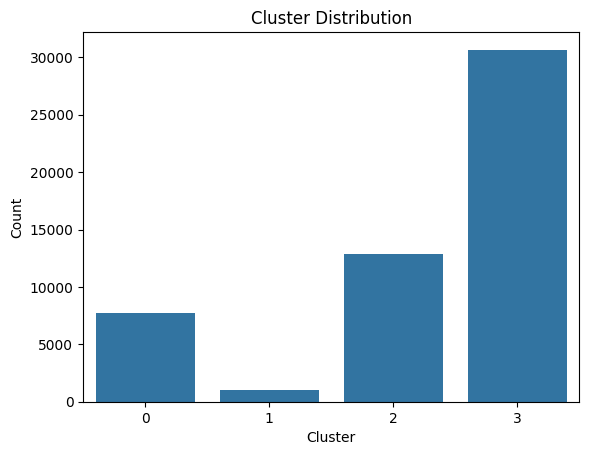

In [ ]:
# Analyze cluster characteristics
cluster_means = df.groupby("Cluster")[features].mean()
print(cluster_means)

# Visualize cluster distribution
sns.countplot(x=df["Cluster"])
plt.title("Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()


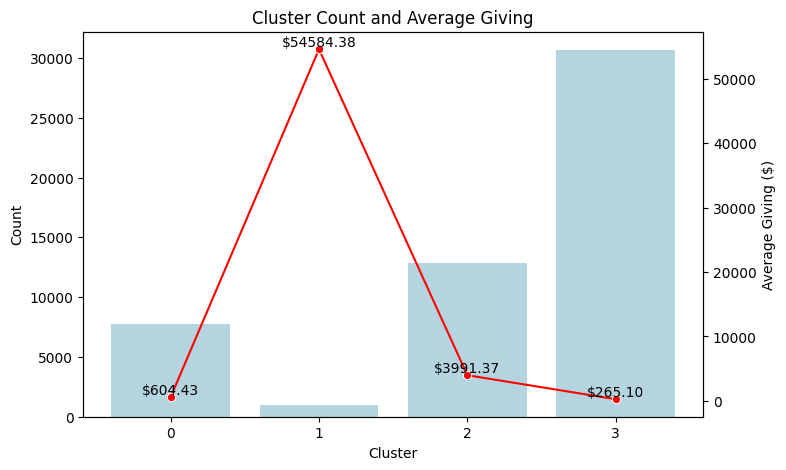

In [ ]:
# Compute the mean values for clustering features (excluding donation information)
cluster_means = df.groupby("Cluster")[features].mean()

# Compute the average 'Gies Lifetime Giving as of 1/8/25' for each cluster
giving_means = df.groupby("Cluster")["Gies Lifetime Giving as of 1/8/25"].mean()

# Compute the number of samples in each cluster
cluster_counts = df["Cluster"].value_counts().sort_index()

# Create a new DataFrame to store the count and average giving per cluster
summary_df = pd.DataFrame({"Count": cluster_counts, "Avg Giving": giving_means})

# Create a bar chart for cluster counts and overlay a line plot for average giving
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot the count of each cluster as a bar chart
sns.barplot(x=summary_df.index, y=summary_df["Count"], color="lightblue", ax=ax1)
ax1.set_ylabel("Count")
ax1.set_xlabel("Cluster")
ax1.set_title("Cluster Count and Average Giving")

# Create a secondary y-axis for average giving and plot it as a line chart
ax2 = ax1.twinx()
sns.lineplot(x=summary_df.index, y=summary_df["Avg Giving"], marker="o", color="red", ax=ax2)
ax2.set_ylabel("Average Giving ($)")

# Annotate each red dot with the corresponding average giving value
for i, txt in enumerate(summary_df["Avg Giving"]):
    ax2.text(i, txt, f"${txt:.2f}", ha="center", va="bottom", fontsize=10, color="black")

plt.show()